Avtor: **Ime in priimek, vpisna številka**

Datum: 15. april 2016

*Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjeval pogojev za pristop k izpitu.*

# Individualni projekt - vzorec

## Ocena individualnega projekta (največ 100%):
* 30% numerična pravilnost*
* 20% uporabniški vmesnik / prikaz rezultatov
* 10% pripravljeni testi pravilnosti kode
* 10% struktura, urejenost in stil kode, komentiranje kode (docstring)
* 10% vsaj dve od ekstra ali ena od EKSTRA funkcij
* 20% lasten odnos / kreativni dodatek

\* Dokler individualni projekt ni numerično pravilen, ocena ne more biti dodeljena (vsak popravek oceno seminarja zmanjša za 10%). Vsak dan zamude oddaje seminarja oceno zmanjša za 5%. 
    
Seminar se odda v obliki mape, ki vsebuje IPython notebook ter vse potrebne datoteke.

Primer ekstra funkcij: animacija rezultatov, pošiljanje na email, zapis v excel, kreiranje poročila (word/pdf, npr. reportLab).

Primer EKSTRA funkcij: zapis v bazo podatkov ali drugo urejeno strukturo (npr. SQLite, Pandas), uporaba slikovne obdelave (npr. scikit.image), zajem eksperimentalnih podatkov z pyDAQmx, interaktivni prikaz (npr. bokeh.pydata.org),  aplikacija v oblaku (npr. Google appengine, Amazon web server), 3D CAD (npr. pythonOCC).


Seminar se odda v obliki source kode, ki jo preverjamo za plagiatorstvo. Če odkrijemo, da so deli projekta enaki do takšne mere, da gre za očiten plagiat, bodo kaznovani vsi udeleženi, ne glede na to, kdo je resnični avtor. Odstotek uspešnosti bomo zmanjšali za dvakratnik tistega, kar bi s plagiatom pridobili.  **Če gre za čisto in očitno prepisovanje, pa se razveljavi celotno sprotno delo in se ne prizna izpolnjevanje pogojev za pristop k izpitu**.

### Definicija naloge

Rešen je zgled 3.1.1 iz knjige - *Janko Slavič - Dinamika, mehanska nihanja in mehanika tekočin (2014)* .

Na sliki 3.22 je prikazan dinamski sistem, sestavljen iz palice mase *m* in dolžine *l*. Torzijska vzmet togosti $k_{\varphi}$ je v vrtišču; na sredini palice je sistem dveh vzporedno vezanih vzmeti, vsaka togosti $k$; na koncu palice pa vzmet togosti $k$. Pri reševanju uporabite prikazano koordinato $\varphi$, ki ima izhodišče v statični ravnovesni legi. Predpostavite nihanje z majhnimi koti.

*Podatki:* $m$ = 1 kg, $l$= 1 m, $k$ = 10 kN/m, $k_{\varphi}$ = 10 kNm/rad, $\varphi_{0}$ = 0.01 rad, $t_{1}$ = 50 ms.

Določite:
1. Število prostostnih stopenj sistema.
* Ali prednapetje zaradi teže spremeni lastno frekvenco sistema?
* Gibalno enačbo glede na statično ravnovesno lego.
* Lastno krožno frekvenco sistema.
* Določite odziv pri $t_{1}$, če sistem izpustimo iz lege $\varphi_{0}$.

Slika 3.22 iz vira Slavič 2014:
<img src='Slavic2014-slika 3.22.png', width=250>

Zahteve pri PiNM:
1. Nalogo rešite v simbolni obliki.
* Definirajte modul vir_zgled_3_1_1.py in v njem funkcijo resi(). Funkcija naj sprejme slovar z numeričnimi podatki in vrne slovar z rešitvami naloge (glede na podatke v viru).
* Spreminjajte parameter $k$ od 1 kN/m do 100 kN/m in izračunajte lastne krožne frekvence sistema. K rezultatu dodajte določeno mero šuma in podatke ustrezno aproksimirajte.
* Predpostavite ustrezne začetne pogoje in izračunajte zasuk sistema za prve 0,2 sekunde.
* Poiščite prve 4 trenutke, ko je nihalo v ravnovesni legi.

### 1. Simbolično reševanje 

In [1]:
# Uvozimo modul za simbolično reševanje
from sympy import *
init_printing()

**Odgovor 1:** Gre za sistem z eno prostostno stopnjo.

**Odgovor 2:** Gre za linearen sistem, zato prednapetje nima vpliva na lastno frekvenco. 

**Odgovor 3: Določitev gibalne enačbe glede na na statično ravnovesno lego.**

Potrebne spremenljivke in podatki:

In [2]:
# Definiramo simbolne parametre
m, l, k, k_varphi, varphi_0, t_1 = symbols('m l k k_varphi varphi_0 t_1', real=True, positive=True)
# Definiramo simbolne spremenljivke
varphi, t = symbols('varphi t')

# Potrebovali bomo MVM okoli vrtišča
Ja = (m*l**2)/3

# Predpostavimo majhne kote
x1 = l/2*varphi
x2 = l*varphi

# Numerične rešitve bomo iskali pri podatkih
podatki = {m: 1., l: 1., k: 10000., k_varphi: 10000., varphi_0: 0.01, t_1: 50./1000}

Zapišemo gibalno enačbo - rotacija okoli vrtišča:

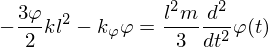

In [3]:
eq = Eq(-k_varphi*varphi -2*k*x1*l/2 -k*x2*l, Ja*varphi(t).diff(t, 2))
eq

Še uredimo in normiramo:

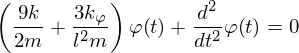

In [4]:
leva = -simplify(eq.args[0]/Ja).coeff(varphi)
desna = eq.args[1]/Ja

eq_urejena = Eq(leva*varphi(t) + desna, 0)
eq_urejena

**Odgovor 4: Določitev lastne krožne frekvence sistema.**

Lastna krožna frekvenca [rad/s]:

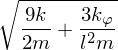

In [5]:
w0_r = sqrt(leva)
w0_r

In [6]:
w0_r.subs(podatki)

Še lastna frekvenca [Hz]:

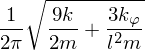

In [7]:
f0_r = w0_r/(2*pi)
f0_r

In [8]:
f0_r.evalf(subs=podatki)

**Odgovor 5: Odziv pri $t_{1}$, če sistem izpustimo iz lege $\varphi_{0}$.**

Zapišemo nastavek za reševanje diferencialne enačbe:

In [9]:
# Potrebovali bomo dodatne spremenljivke:
omega_0, A, B = symbols('omega_0 A B')

nastavek = A*cos(omega_0*t) + B*sin(omega_0*t)
nastavek

Iz začetnega zasuka $\varphi$(t=0) = $\varphi_{0}$ izračunamo A:

In [10]:
eq1 = Eq(nastavek.subs(t, 0), varphi_0)
eq1

Ker smo spustili sistem iz stanja mirovanja velja tudi: $\dot{\varphi}$(t=0) = 0:

In [11]:
eq2 = Eq(nastavek.diff(t).subs(t, 0), 0)
eq2

Velja torej:

In [12]:
A_n = eq1.args[1]
B_n = eq2.args[1]

Glede na začetne pogoje sistem torej niha po enačbi:

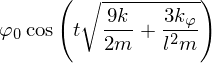

In [13]:
fi = nastavek.subs('A', A_n).subs('B', B_n).subs('omega_0', w0_r)
fi

Ob času $t_1$ je zasuk torej:

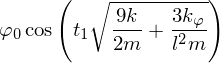

In [14]:
fi.subs(t, t_1)

In [15]:
fi.subs(t, t_1).subs(podatki)

### 2. Test modula

Uvozimo modul:

In [16]:
import vir1_zgled_3_1_1

Pripravimo podatke tako, da bodo spremenljivke poimenovane s nizom (string) in ne kot simbol:

In [17]:
podatki_str={str(key):value for key, value in podatki.items()}

Sedaj pridobimo rešitev:

In [18]:
resitve = vir1_zgled_3_1_1.resi(podatki_str)

lastna = resitve['w_0']
odziv = resitve['odziv']

print('Lastna krožna frekvenca znaša: {:g} rad/s.'.format(lastna))
print('Zasuk pri času t1 znaša: {:g} rad.'.format(odziv))

Lastna krožna frekvenca znaša: 273.861 rad/s.
Zasuk pri času t1 znaša: 0.00429648 rad.


Preverimo še z analitično rešitvijo:

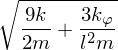

In [19]:
w0_r

In [20]:
w0_r.subs(podatki)

### 3. Aproksimacija

Uvozimo potreben modul:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Izračun bomo izvršili z uporabo modula vir1_zgled_3_1_1, ki smo ga uvozili zgoraj:

In [22]:
pod = podatki_str
def podatki_posodobi(novi_k):
    pod['k'] = novi_k
    return pod

In [23]:
k_num = np.linspace(1, 10, 20)*1000   # Izračunali bomo v 20 primerih

# Izračunamo vse rešitve
resitve = [vir1_zgled_3_1_1.resi(podatki_posodobi(k_)) for k_ in k_num]

# V seznam lastne si shranimo le lastne vrednosti in dodamo šum
lastne = [res['w_0']+np.random.normal(scale=1) for res in resitve]

Narišemo izračunane rešitve:

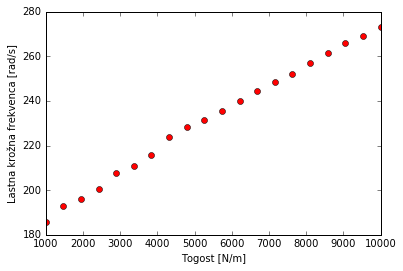

In [24]:
plt.plot(k_num, lastne, 'ro');
plt.xlabel('Togost [N/m]');
plt.ylabel('Lastna krožna frekvenca [rad/s]');

Aproksimirajmo izračunane podatke z premico:

In [25]:
# Shranimo še lastne kot np.array
lastne = np.asarray(lastne, dtype=float)

parametri = np.polyfit(k_num, lastne, deg=1)
parametri

array([  9.63171716e-03,   1.79043437e+02])

Narišemo aproksimacijsko premico ter prvotne podatke:

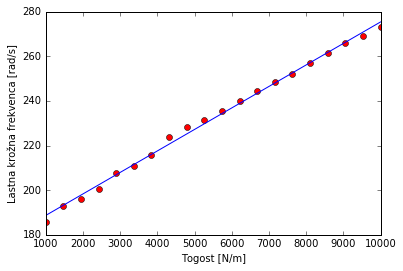

In [26]:
x = np.linspace(min(k_num), max(k_num), 100)

plt.plot(k_num, lastne, 'ro');
plt.plot(x, np.polyval(parametri, x), 'b');
plt.xlabel('Togost [N/m]');
plt.ylabel('Lastna krožna frekvenca [rad/s]');

## Lasten odnos: nadgradnja aproksimacije

Tukaj ugotovimo, da aproksimacija z linearno funkcijo nima dosti smisla. Naloga definira, da naj podatke *ustrezno* approkimiramo; najprej poskusimo s polinomom višje stopnje.

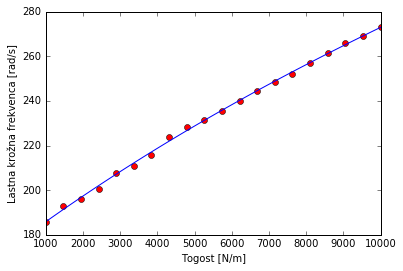

In [27]:
parametri = np.polyfit(k_num, lastne, deg=3)
x = np.linspace(min(k_num), max(k_num), 100)

plt.plot(k_num, lastne, 'ro');
plt.plot(x, np.polyval(parametri, x), 'b');
plt.xlabel('Togost [N/m]');
plt.ylabel('Lastna krožna frekvenca [rad/s]');

Ugotovimo bistveno boljše ujemanje, vendar sedaj poskusimo še s poznavanjem gibalne enečbe. Vemo, da velja: 
$$\omega_0=\sqrt{\frac{9 k}{2 m} + \frac{3 k_{\varphi}}{l^{2} m}}.$$
Maso in dolžino relativno enostavno določimo. Poskusimo tukaj iz izmerjenih podatkov identificirati $k_{\varphi}$. Vemo: 

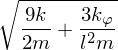

In [28]:
w0_r

Sledi, da lahko zapišemo funkcijo za aproksimacijo (identificirati želimo parameter $k_{\varphi}$):

In [29]:
def w0_za_approx(k, kr):
    return np.sqrt(9*k/(2*podatki_str['m'])+3*kr/(podatki_str['l']**2*podatki_str['m']))

In [30]:
from scipy import optimize

In [31]:
res, _ = optimize.curve_fit(w0_za_approx, k_num, lastne)
res

array([ 9936.86060835])

Identificirana vrednost je zelo blizu pravi:

In [32]:
podatki_str['k_varphi']

### 4. Reševanje diferencialne enačbe

Izpišemo diferencialno enačbo, ki jo rešujemo:

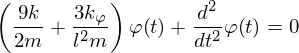

In [33]:
eq_urejena

In [34]:
m = 1
l = 1
k = 1e4
k_fi = 1e4
fi_0 = 0.01
t_1 = 0.05
dt=0.001

In [35]:
fi_zp = np.array([fi_0, 0])

In [36]:
def funkcija_dif(fi, t):
    return np.array([fi[1], -(9*k/(2*m) + 3*k_fi/(l**2*m))*fi[0]])

In [37]:
from scipy.integrate import odeint

In [38]:
time = np.linspace(0, t_1, 100)
fi_resitev = odeint(funkcija_dif, fi_zp, time)

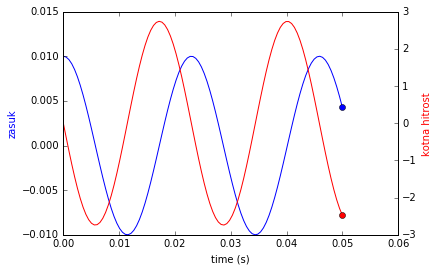

In [39]:
fig, ax1 = plt.subplots()
ax1.plot(time, fi_resitev[:,0], 'b')
ax1.plot(time[-1], fi_resitev[-1,0], 'bo')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('zasuk', color='b')

ax2 = ax1.twinx()
ax2.plot(time, fi_resitev[:,1],'r')
ax2.plot(time[-1], fi_resitev[-1,1], 'ro')
ax2.set_ylabel('kotna hitrost', color='r')
plt.show()

### 5. Iskanje ničel

Pri iskanju ničel v splošnem iščemo $f(t)=0$, ker nam zgornja numerična rešitev ne da vrednosti funkcije $f(t)$ pri poljubnem času $t$, moramo najprej izvesti odsekovno polinomsko interpolacijo (uporabili bomo `scipy` implementacijo kubičnih zlepkov 3 stopnje):

In [61]:
from scipy.interpolate import InterpolatedUnivariateSpline
zasuk = InterpolatedUnivariateSpline(time, fi_resitev[:,0])
zasuk(0.)

array(0.01)

Lahko si pripravimo tudi kotno hitrost (glede na interpolacijsko funkcijo zgoraj, lahko bi interpolirali tudi numerične rezultate):

In [66]:
kotna_hitrost = zasuk.derivative(n=1)

Odsekovna interpolacija ima na robovih relativno veliko napako:

In [68]:
kotna_hitrost(0)

array(0.0012857441328962584)

In [69]:
fi_resitev[0,1]

Prikažimo, da lahko sedaj prikažemo vrednosti poljubno gosto:

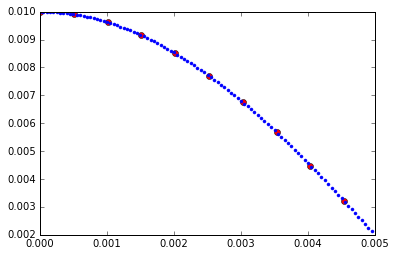

In [70]:
time2 = np.linspace(0, t_1, 1000)
plt.plot(time[time<t_1/10], fi_resitev[time<t_1/10,0], 'or')
plt.plot(time2[time2<t_1/10],  zasuk(time2)[time2<t_1/10], '.b')
plt.show()

In sedaj lahko nadaljujemo z iskanjem ničle (ko je zasuk enak nič):

In [71]:
# Uvozimo ustrezne module
from scipy import optimize

Pripravimo optimizirano funkcijo za uporabo v Newtonovi metodi:

In [72]:
zasuk(0)

array(0.01)

Poiščemo prvo ničlo:

In [75]:
nicla_0 = optimize.newton(zasuk, 0.01)
nicla_0

Vemo, da se ničle pojavijo na periodo polovic; izračunamo perido:

In [84]:
T = float(2*np.pi/w0_r.subs(podatki).evalf())
T

Sledi izračun ničel:

In [91]:
nicle = [optimize.newton(zasuk, 0.01+i*T/2) for i in range(4)]
nicle

Preverimo še ustreznost rešitev:

In [92]:
[zasuk(nicla) for nicla in nicle]

[array(-9.660915595071859e-15),
 array(1.0253388433668624e-14),
 array(-1.1281936756341038e-14),
 array(1.1814815347854085e-14)]

In izrišemo:

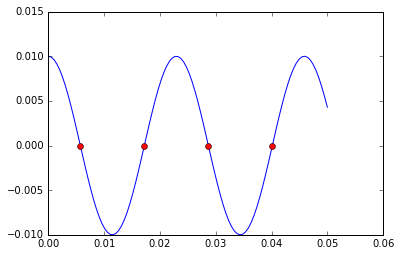

In [93]:
x = np.linspace(0, t_1, 100)
plt.plot(x, [zasuk(_) for _ in x])
plt.plot(nicle, [zasuk(nicla) for nicla in nicle], 'ro');